<a href="https://colab.research.google.com/github/Yaroslav1121/MachineLearning/blob/main/%D0%9B%D0%B0%D0%B1_9_%D0%9A%D0%BB%D0%B8%D0%BC%D1%96%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЛАБОРАТОРНА РОБОТА 9

In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

# Виведення перших 5 рядків
print(df.head())


Saving mushroom_cleaned.csv to mushroom_cleaned.csv
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  


In [2]:
# Розмір датасету (кількість рядків та стовпців)
print(f"Розмір датасету: {df.shape}")

# Перевірка наявності пропущених даних
print("\nКількість пропущених значень у кожному стовпці:")
print(df.isnull().sum())

# Виведення типів даних
print("\nТипи даних:")
print(df.dtypes)


Розмір датасету: (54035, 9)

Кількість пропущених значень у кожному стовпці:
cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

Типи даних:
cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object


In [3]:
# Матриця кореляції
correlation_matrix = df.corr()
print("\nМатриця кореляції:")
print(correlation_matrix)



Матриця кореляції:
                 cap-diameter  cap-shape  gill-attachment  gill-color  \
cap-diameter         1.000000   0.204011         0.200481    0.186377   
cap-shape            0.204011   1.000000         0.043066    0.131387   
gill-attachment      0.200481   0.043066         1.000000    0.100276   
gill-color           0.186377   0.131387         0.100276    1.000000   
stem-height          0.135652  -0.010393        -0.075284    0.015057   
stem-width           0.828469   0.222494         0.245300    0.110283   
stem-color           0.121856   0.029035         0.020073    0.186090   
season               0.113334   0.055442        -0.040315    0.059965   
class               -0.165676  -0.133338        -0.052541   -0.063947   

                 stem-height  stem-width  stem-color    season     class  
cap-diameter        0.135652    0.828469    0.121856  0.113334 -0.165676  
cap-shape          -0.010393    0.222494    0.029035  0.055442 -0.133338  
gill-attachment    -0.07

In [9]:
# Кореляція зі стовпцем цільової змінної 'class'
target_column = 'class'
correlation_with_target = df.corr()[target_column].sort_values(ascending=False)
print(f"\nКореляція з цільовою змінною '{target_column}':")
print(correlation_with_target)



Кореляція з цільовою змінною 'class':
class              1.000000
stem-height        0.183354
gill-attachment   -0.052541
gill-color        -0.063947
season            -0.082919
stem-color        -0.128339
cap-shape         -0.133338
cap-diameter      -0.165676
stem-width        -0.182856
Name: class, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split

# Розділення на вхідні дані (X) та цільову змінну (y)
X = df.drop(columns=['class'])  # Замініть 'target' на вашу цільову змінну
y = df['class']

# Розділення на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Випадковий ліс
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Логістична регресія
lr = LogisticRegression(max_iter=5000, random_state=42)
lr_params = {'C': [0.1, 1, 10]}
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000, random_state=42),
             param_grid={'C': [0.1, 1, 10]}, scoring='accuracy')

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Прогноз для обох моделей
y_pred_rf = rf_grid.predict(X_test)
y_pred_lr = lr_grid.predict(X_test)

# Оцінка точності
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Точність Випадкового лісу: {accuracy_rf}")
print(f"Точність Логістичної регресії: {accuracy_lr}")

# Вибір кращої моделі
best_model = rf_grid if accuracy_rf > accuracy_lr else lr_grid
print(f"Найкраща модель: {'Випадковий ліс' if accuracy_rf > accuracy_lr else 'Логістична регресія'}")


Точність Випадкового лісу: 0.9908392708429722
Точність Логістичної регресії: 0.6364393448690664
Найкраща модель: Випадковий ліс


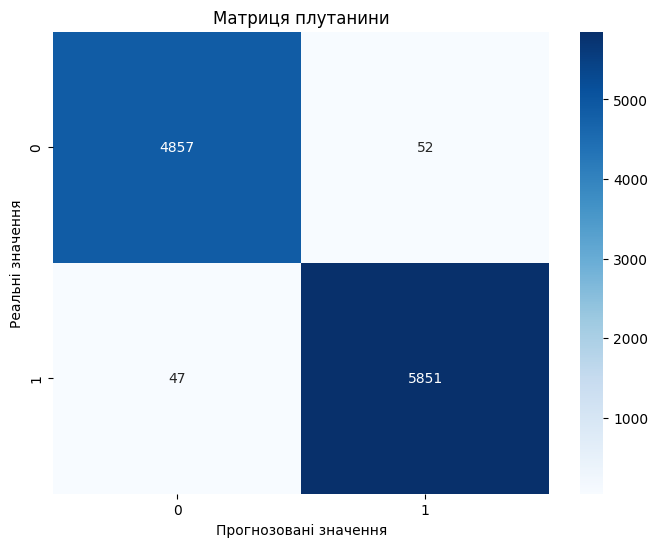


Класифікаційний звіт:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Виведення матриці плутанини
conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матриця плутанини')
plt.ylabel('Реальні значення')
plt.xlabel('Прогнозовані значення')
plt.show()

# Класифікаційний звіт
print("\nКласифікаційний звіт:")
classification_report(y_test, best_model.predict(X_test))


Увага! У вашому датасеті є нечислові ознаки. Їх слід перетворити на числові перед кластеризацією.


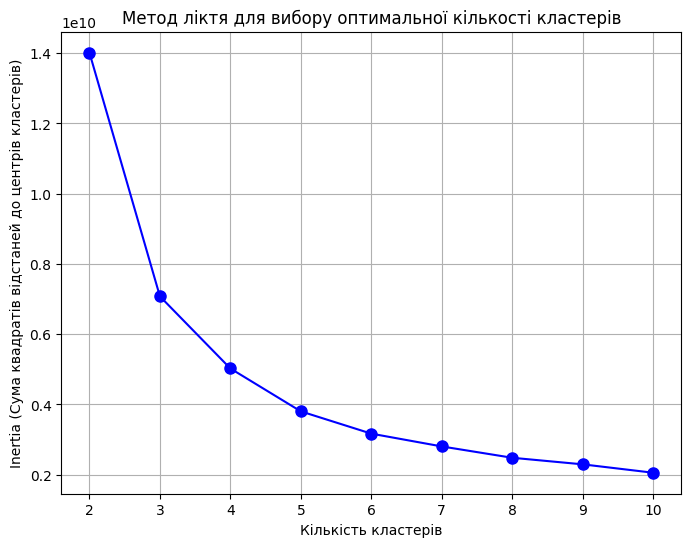

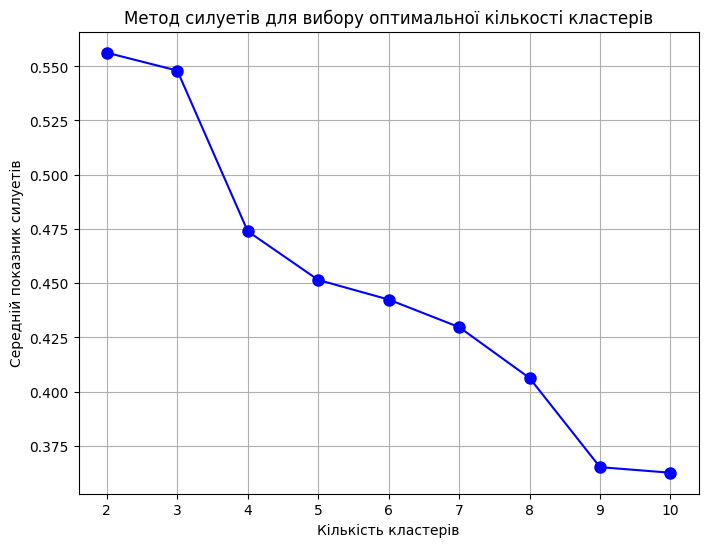

In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Перевіряємо, чи немає пропущених значень
if df.isnull().sum().any():
    print("Увага! Є пропущені значення у датасеті. Спершу потрібно їх обробити.")

# Припускаємо, що 'class' — це цільова змінна, яку ми виключаємо перед кластеризацією
X = df.drop(columns=['class'])

# Перевіряємо, чи всі колонки числові
if not np.all(np.issubdtype(X.dtypes, np.number)):
    print("Увага! У вашому датасеті є нечислові ознаки. Їх слід перетворити на числові перед кластеризацією.")

# Метод ліктя
inertia = []
cluster_range = range(2, 11)  # Перевіряємо кількість кластерів від 2 до 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Збираємо значення інерції (суму відстаней до центроїдів)

# Візуалізуємо результат методу ліктя
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, 'bo-', markersize=8)
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia (Сума квадратів відстаней до центрів кластерів)')
plt.title('Метод ліктя для вибору оптимальної кількості кластерів')
plt.grid(True)
plt.show()

# Метод силуетів
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Візуалізуємо результат методу силуетів
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній показник силуетів')
plt.title('Метод силуетів для вибору оптимальної кількості кластерів')
plt.grid(True)
plt.show()


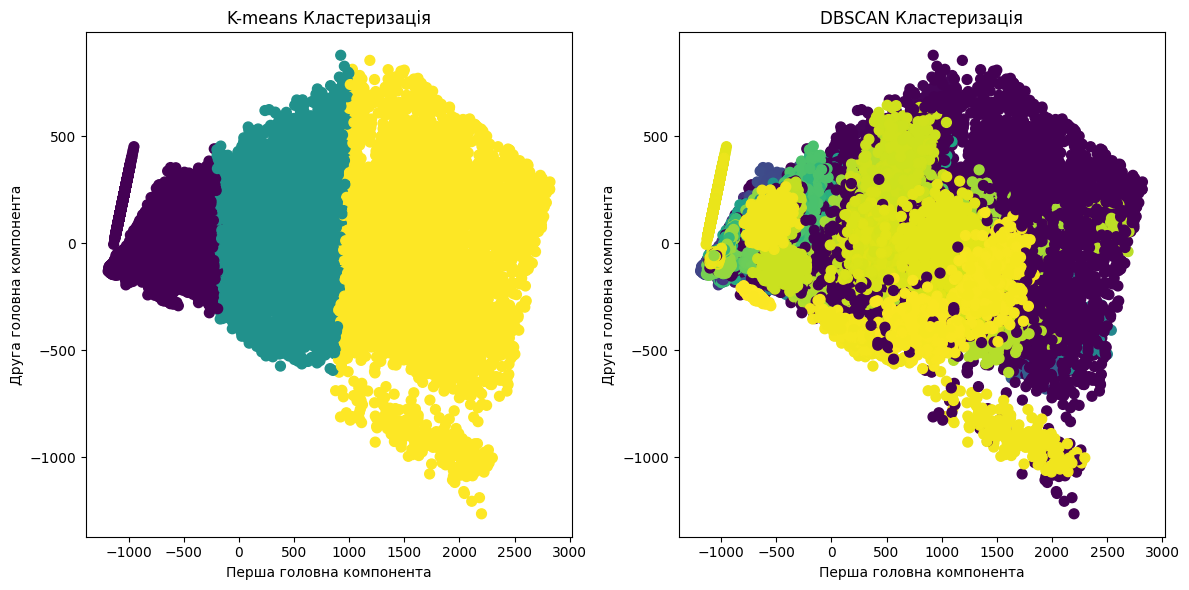

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Виключаємо колонку 'class' для кластеризації
X = df.drop(columns=['class'])

# Масштабуємо дані перед використанням DBSCAN, оскільки він чутливий до масштабів
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Виконуємо кластеризацію K-means (наприклад, з 3 кластерами)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# 2. Виконуємо кластеризацію DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Зменшуємо eps і збільшуємо мінімальну кількість точок
dbscan_labels = dbscan.fit_predict(X_scaled)


# 3. Використовуємо PCA для зменшення розмірності до 2D для візуалізації
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 4. Візуалізуємо результати кластеризації методом K-means
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Перша діаграма - K-means
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-means Кластеризація')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')


plt.subplot(1, 2, 2)  # Друга діаграма - DBSCAN
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Кластеризація')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')

plt.tight_layout()
plt.show()
